# Comparison of keyword search vs semantic search

In [1]:
# pip install numpy scikit-learn sentence-transformers matplotlib seaborn

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

def plot_similarity_matrix(chunks, vectors, title="Similarity Matrix", figsize=(12, 8)):
    """
    Create and plot a similarity matrix for a given set of vectors.

    Parameters:
    -----------
    chunks : list
        List of text chunks/sentences
    vectors : array
        Matrix of vectors (either keyword-based or embedding-based)
    title : str, optional
        Title for the plot, default is "Similarity Matrix"
    figsize : tuple, optional
        Figure size as (width, height), default is (12, 8)
    """
    # Create similarity matrix
    similarity_matrix = cosine_similarity(vectors)

    # Create figure
    plt.figure(figsize=figsize)

    # Plot similarity matrix
    sns.heatmap(similarity_matrix,
                annot=True,
                cmap='Blues',
                xticklabels=chunks,
                yticklabels=chunks)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    plt.tight_layout()
    plt.show()

    return similarity_matrix

# Example corpus
chunks = [
    "I really enjoyed the film we watched last night",
    "The movie was excellent",
    "I didn't like the documentary",
    "The cinematic experience was remarkable"
]

query = "The film was great"



Similarity based on keywords:


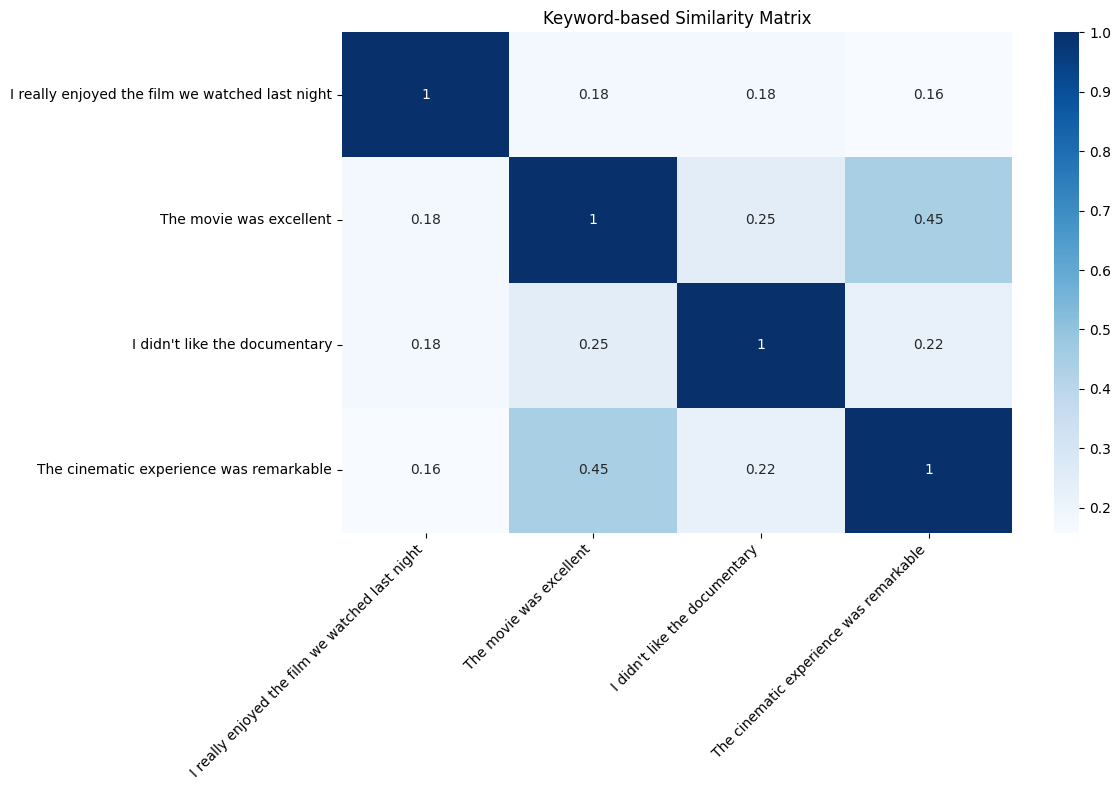

In [6]:

# Keyword-based approach (Bag of Words)
vectorizer = CountVectorizer()
keyword_vectors = vectorizer.fit_transform(chunks)
keyword_matrix = keyword_vectors.toarray()

# Query
query_keywords = vectorizer.transform([query]).toarray()

print("Similarity based on keywords:")
# for i, doc in enumerate(chunks):
#     similarity = cosine_similarity(query_keywords, [keyword_matrix[i]])[0][0]
#     print(f"Chunk {i+1}: {similarity:.4f} - {doc}")

keyword_sim_matrix = plot_similarity_matrix(
    chunks,
    keyword_matrix,
    title="Keyword-based Similarity Matrix"
)


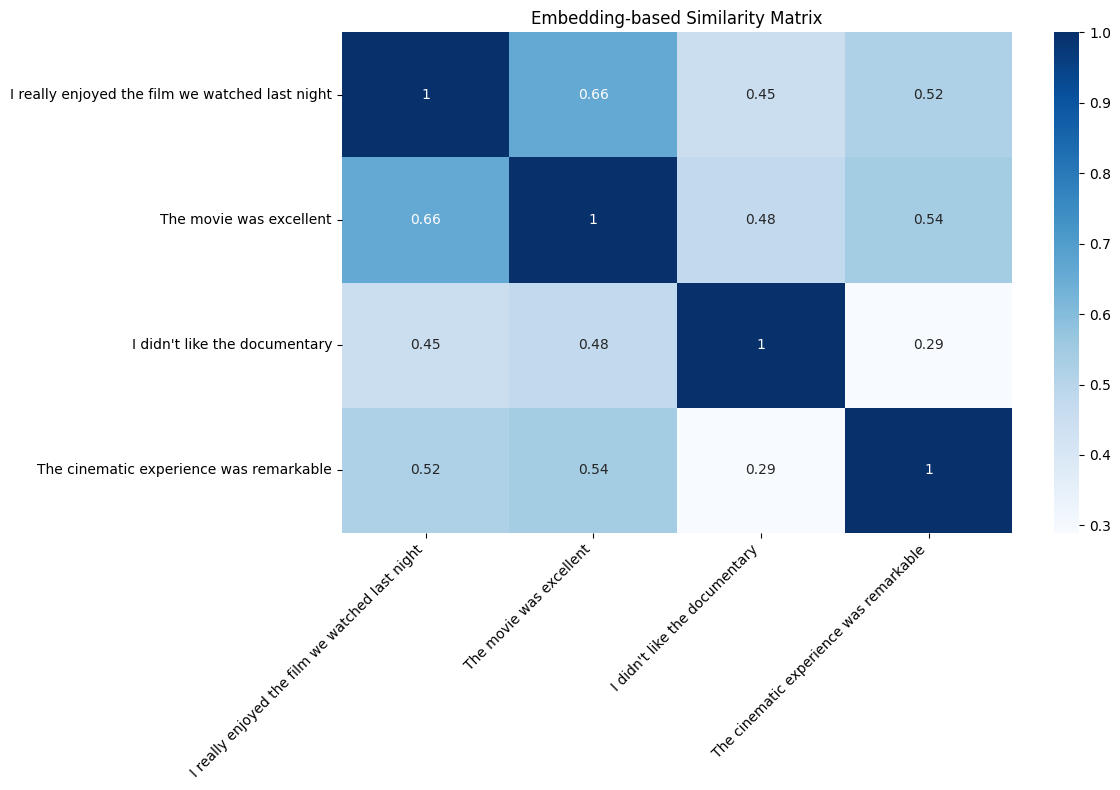

In [7]:
# Embedding-based approach
model = SentenceTransformer('all-MiniLM-L6-v2')
embedding_vectors = model.encode(chunks)

# Query
query_embedding = model.encode([query])[0]

# print("\nSimilarity based on embeddings:")
# for i, doc in enumerate(chunks):
#     similarity = cosine_similarity([query_embedding], [embedding_vectors[i]])[0][0]
#     print(f"Chunk {i+1}: {similarity:.4f} - {doc}")

embedding_sim_matrix = plot_similarity_matrix(
    chunks,
    embedding_vectors,
    title="Embedding-based Similarity Matrix"
)